In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from unc_tools import UncRegression, FunctionBase1D
import os

SAVE_DIR = os.path.expanduser("~/Obsidian/physha_practice/кондуктометрия/")
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")

UncRegression.latex_style(True)

V = 0.6
V0 = 100
ro = 0.899
M = 12 * 4 + 8 + 16 * 2

a = V * ro / (M * (V + V0))
b = 5e-3 #oh-
a = 0.061 #ch3cooh


def func(x):
    return 1 / (b - a) * np.log((b - x) / (a - x))

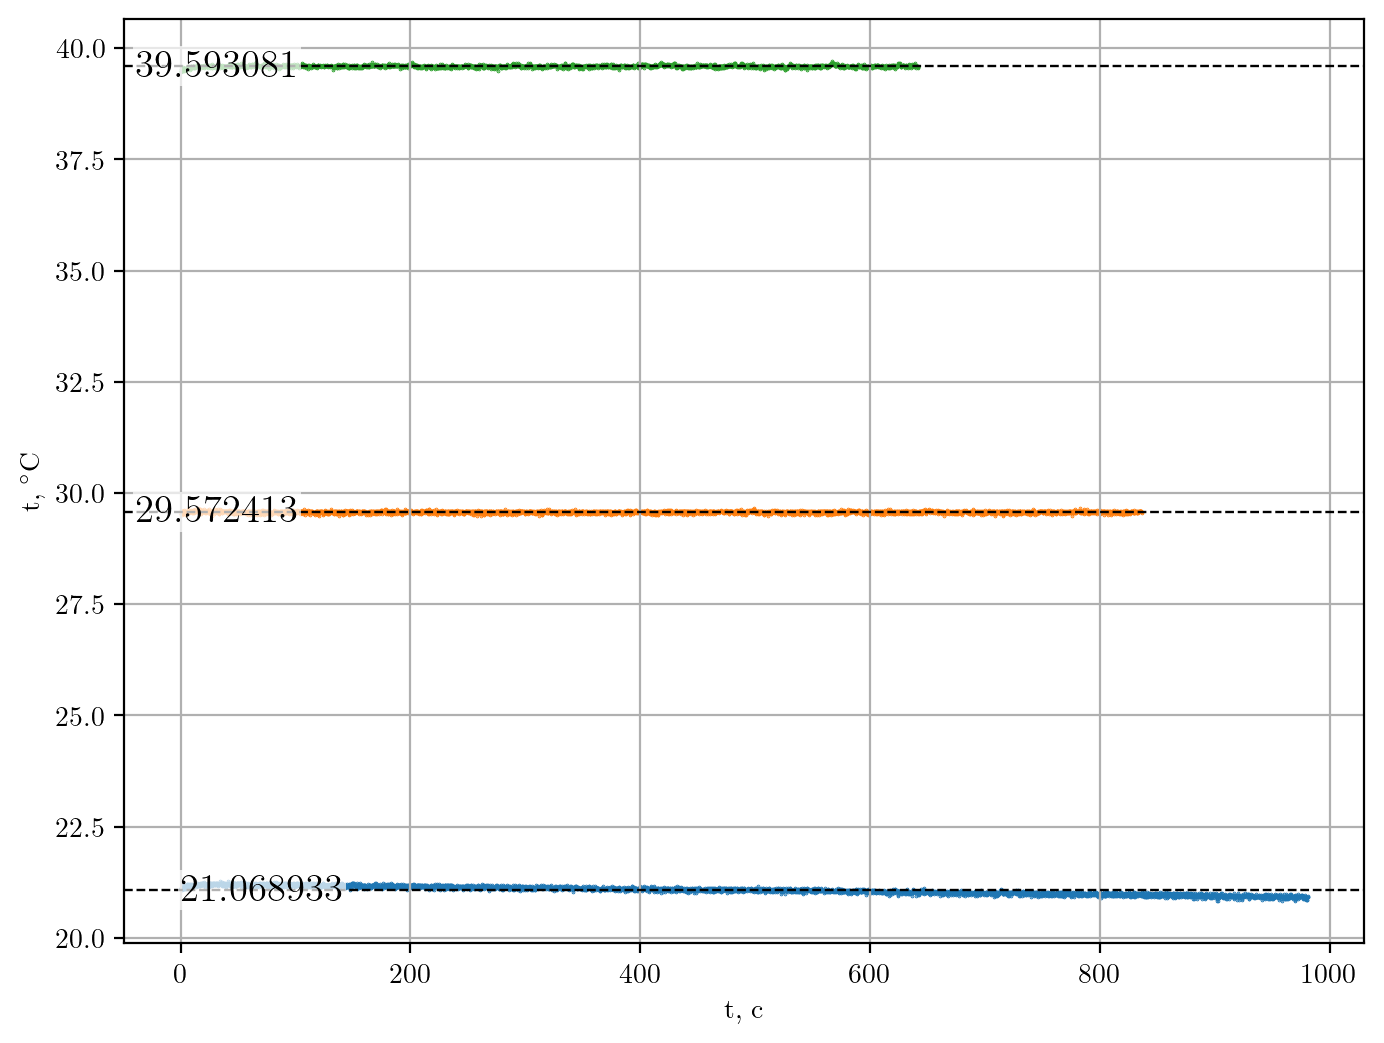

In [6]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 200)
temp = []

for i in range(1,4):

    with open(f"data/T{i}.txt", "r") as f:
        df_exp = pd.read_csv(
            f"data/T{i}.txt",
            sep="\t",
            dtype=np.float32,
            decimal=",",
            names=["time", "temp"],
        )

        reg = UncRegression(df_exp.time, df_exp.temp, FunctionBase1D("a"))
        ax.axhline(
        reg.coefs[0].n, color="black", linestyle="--", linewidth=0.85
        )
        ax.text(
            x=ax.get_xlim()[0]*0.8,  # край справа
            y=reg.coefs_nom[0],
            s=f"{reg.coefs_nom[0]:2f}",  # текст метки
            va="center",  # вертикальное выравнивание
            ha="left",  # горизонтальное выравнивание
            fontsize=14,
            bbox=dict(
                facecolor="white", edgecolor="none", alpha=0.7, pad=1
            ), 
        )
        temp.append(reg.coefs[0])
        ax.scatter(df_exp.time, df_exp.temp, s = 0.1)

ax.grid()
ax.set_ylabel("t, $^\\circ$C")
ax.set_xlabel("t, c")

savefig("temp-time", fig=fig)

490
1 0.756 0.3476923062251166
418
2 0.966 0.4211028034441939
321
3 1.099 0.5282499998807908


/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yaroslav/notebooks/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.08916579999435259+/-0.00018420034188773167,
 0.1484838074032624+/-0.0011312088192671316,
 0.2726935610236927+/-0.0013432258157751436]

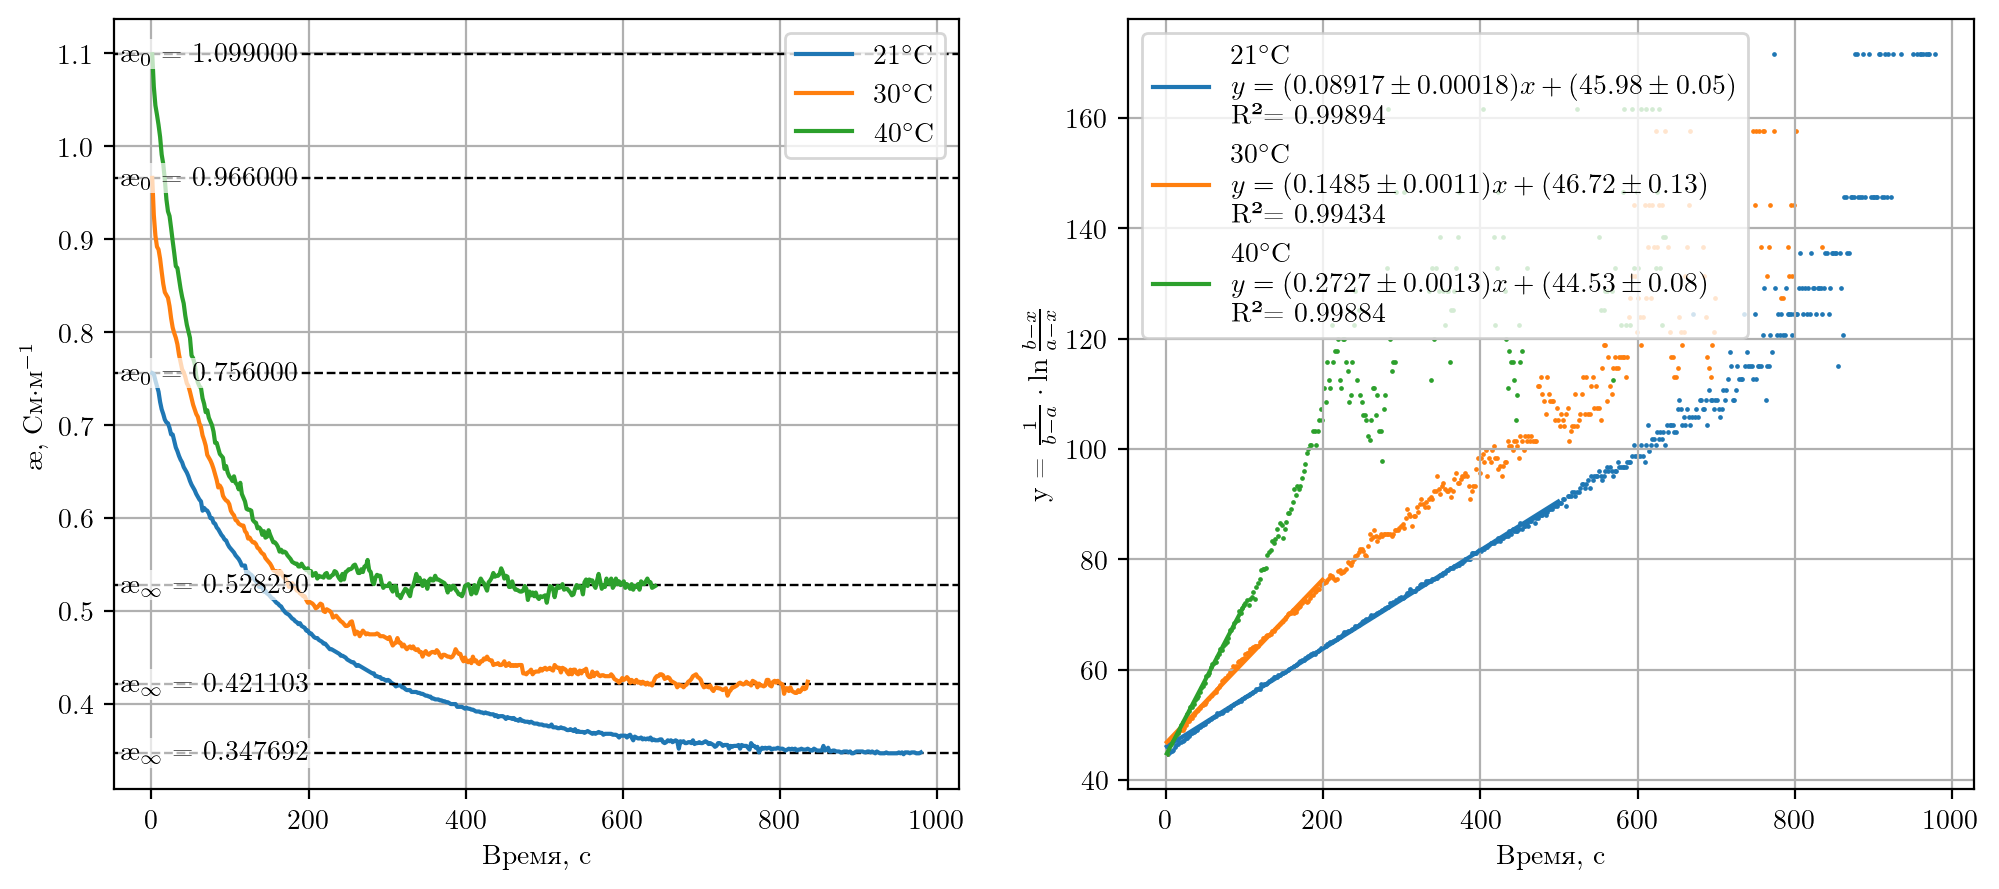

In [7]:

slices = [slice(0, 250), slice(0, 100), slice(0, 50)]
slices2 = [slice(450, -1), slice(310, -1), slice(300, -1)]


k = []
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=200)
axes = axes.flatten()

ax1 = axes[0]
ax2 = axes[1]

for j in range(1, 4):
    df_exp = pd.read_csv(
        f"data/exp{j}.txt",
        sep="\t",
        dtype=np.float32,
        decimal=",",
        names=["time", "kappa"],
    )
    print(len(df_exp))
    # df_exp.to_csv(f"export/default_data{j}.csv")

    reg_kappainf = UncRegression(
        df_exp.time[slices2[j - 1]], df_exp.kappa[slices2[j - 1]], FunctionBase1D("a")
    )
    kappainf = reg_kappainf.coefs[0].n
    kappa0 = df_exp.kappa.iloc[0]
    print(j, kappa0, kappainf)
    
    ax1.axhline(
        kappainf, color="black", linestyle="--", linewidth=0.85
    )
    ax1.text(
        x=ax.get_xlim()[0]*0.8,  # край справа
        y=kappainf,
        s=f"$\\ae_{{\\infty}}$ = {kappainf:5f}",  # текст метки
        va="center",  # вертикальное выравнивание
        ha="left",  # горизонтальное выравнивание
        fontsize=10,
        bbox=dict(
            facecolor="white", edgecolor="none", alpha=0.7, pad=1
        ), 
    )
    ax1.axhline(
        kappa0, color="black", linestyle="--", linewidth=0.85
    )
    ax1.text(
        x=ax.get_xlim()[0]*0.8,  # край справа
        y=kappa0,
        s=f"$\\ae_{{0}}$ = {kappa0:5f}",  # текст метки
        va="center",  # вертикальное выравнивание
        ha="left",  # горизонтальное выравнивание
        fontsize=10,
        bbox=dict(
            facecolor="white", edgecolor="none", alpha=0.7, pad=1
        ), 
    )
    
    # kappainf = df_exp.kappa.iloc[-1]
    df_exp["x"] = b * (df_exp.kappa - kappa0) / (kappainf - kappa0)

    ax1.plot(df_exp.time, df_exp.kappa, label = f"{temp[j-1].n:.0f}$^\\circ$C")
    ax1.set_xlabel("Время, с")
    ax1.set_ylabel("$\\ae$, См$\\cdot$м$^{-1}$")
    ax1.grid()
    ax1.legend()

    df_exp["y"] = func(df_exp.x)
    df_exp.replace([np.inf, -np.inf], np.nan).dropna()
    df_exp.to_csv(f"export/default_data{j}.csv")

    ax2.scatter(df_exp.time, df_exp.y, s=0.5)
    sl = slices[j - 1]
    df_exp = df_exp.iloc[sl]

    reg = UncRegression(df_exp.time, df_exp.y)
    reg.plot(ax=ax2, show_scatter=False,label = f"{temp[j-1].n:.0f}$^\\circ$C")
    ax2.set_xlabel("Время, с")
    ax2.set_ylabel("y = $\\frac{1}{b-a} \\cdot \\ln \\frac{b-x}{a-x}$")

    reg.to_csv(f"export/fitted_data{j}.csv")
    k.append(reg.coefs[0])


savefig("prak4", fig=fig)

k

                   k    temp
0  0.08917+/-0.00018  295.95
1    0.1485+/-0.0011  302.95
2    0.2727+/-0.0013  312.75


(51370.75244591113+/-240.32889684532287,
 array(104196287.79650491+/-10088274.747190947, dtype=object),
 0    22.8
 1    29.8
 2    39.6
 Name: temp, dtype: float64)

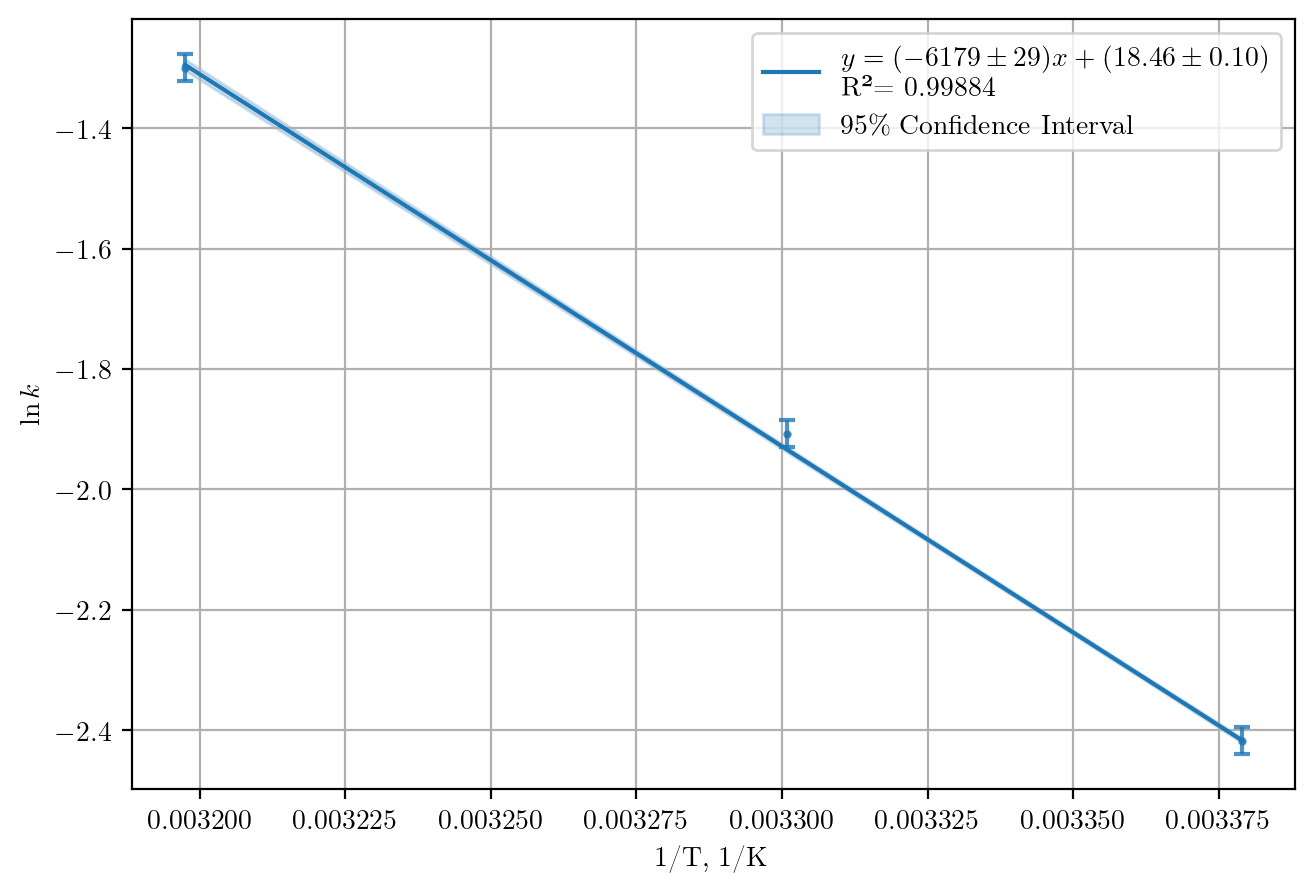

In [8]:
import uncertainties.unumpy as unp
import uncertainties as unc

df = {"k": k,
      "temp": [295.95, 302.95, 312.75]}


df = pd.DataFrame(df)
print(df)
#df.temp += 273.15

reg = UncRegression(1/df.temp, unp.log(df.k))

fig, ax = plt.subplots(figsize=(7.5,5), dpi = 200)

reg.plot(ax = ax, show_band = True)
ax.set_xlabel("1/T, 1/K")
ax.set_ylabel("$\\ln k$")


savefig("final.png", fig = fig)

reg.to_csv("export/final.csv")

Ea = -8.314 * reg.coefs[0]
k1 = unc.unumpy.exp(reg.coefs[1])

Ea, k1, df.temp - 273.15